In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data/MEX_GOB_2017.csv', encoding='latin1', skiprows=6)
catalogo = pd.read_csv('data/Cat_Candidatos_Gobernador.csv', encoding='ISO-8859-1')

In [3]:
data.columns

Index(['id_estado', 'estado', 'id_distrito_local', 'distrito_local', 'seccion',
       'id_casilla', 'tipo_casilla', 'extraordinariacontigua',
       'ubicacion_casilla', 'tipo_de_acta', 'boletas_sobrantes',
       'total_ciudadanos_votaron', 'num_boletas_extraidas', 'pan', 'pri',
       'prd', 'pt', 'pvem', 'na', 'morena', 'pes', 'c_pri_pvem_na_pes',
       'c_pri_pvem_na', 'c_pri_pvem_pes', 'c_pri_na_pes', 'c_pri_pvem',
       'c_pri_na', 'c_pri_pes', 'c_pvem_na_pes', 'c_pvem_na', 'c_pvem_pes',
       'c_na_pes', 'cand_ind_1', 'no_registrados', 'nulos', 'total_votos',
       'lista_nominal', 'observaciones', 'contabilizada',
       'mecanismo_de_traslado', 'sha', 'fecha_hora_acopio',
       'fecha_hora_captura', 'fecha_hora_registro'],
      dtype='object')

In [29]:
d_locales = data[['id_distrito_local','distrito_local']].drop_duplicates()

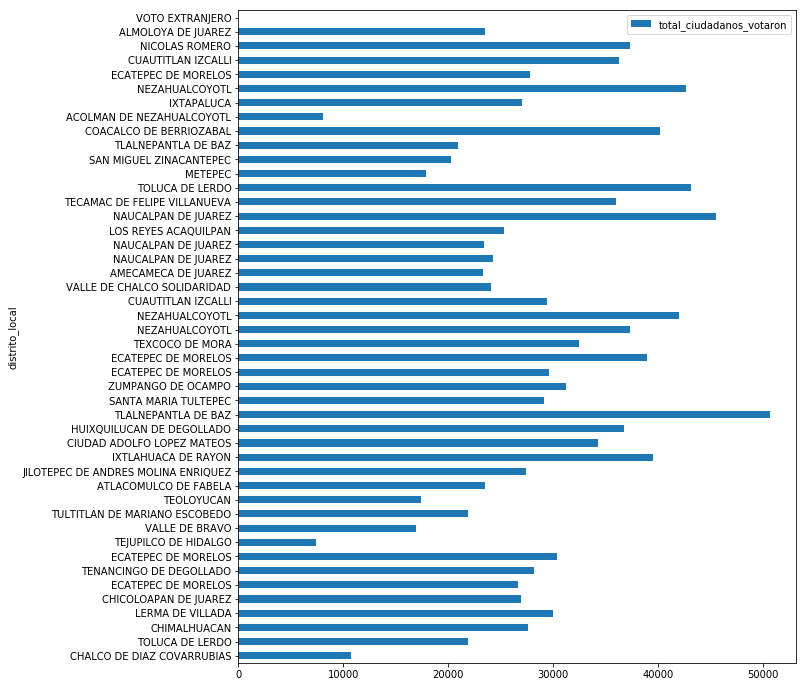

In [32]:
%matplotlib inline
data.groupby('id_distrito_local').total_ciudadanos_votaron.sum().reset_index()\
.merge(d_locales, on='id_distrito_local')\
.plot(kind='barh', x='distrito_local', y='total_ciudadanos_votaron', figsize=(10,12));